## Increasingly Noisy Bayeisan Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from BayesianOptimization.bayes_opt import BayesianOptimization

#### A Target Function Example (user's preferences)

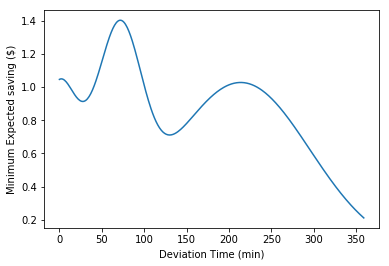

In [2]:
# use sklearn's default parameters for theta and random_start
gp_params = {"alpha": 1e-5, "n_restarts_optimizer": 2}

np.random.seed(42)
xs = np.linspace(0, 10, 6*60)
f = np.exp(-(xs - 2)**2) + np.exp(-(xs - 6)**2/10) + 1/ (xs**2 + 1)

plt.plot(f)
plt.xlabel('Deviation Time (min)')
plt.ylabel('Minimum Expected saving ($)')
plt.show()

#### Aux Plot Function

In [3]:
def plot_bo(f, bo):
    xs = [x["x"] for x in bo.res["all"]["params"]]
    ys = bo.res["all"]["values"]

    mean, sigma = bo.gp.predict(np.arange(len(f)).reshape(-1, 1), return_std=True)

    plt.figure(figsize=(16, 9))
    plt.plot(f)
    plt.plot(np.arange(len(f)), mean)
    plt.fill_between(np.arange(len(f)), mean + sigma, mean - sigma, alpha=0.1)
    plt.scatter(bo.X.flatten(), bo.Y, c="red", s=50, zorder=10)
    plt.xlim(0, len(f))
    plt.ylim(f.min() - 0.1 * (f.max() - f.min()), f.max() + 0.1 * (f.max() - f.min()))
    plt.xlabel('Deviation Time (min)')
    plt.ylabel('Minimum Expected saving ($)')
    plt.show()

#### 0-Noise Baysian Optimization with Upper Confidence Bound (25 queries) encouraging exploration

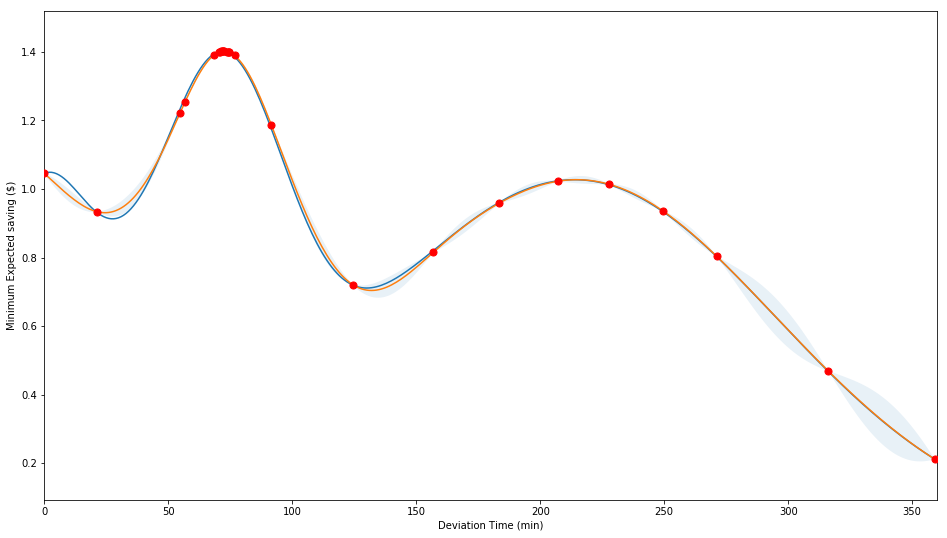

In [4]:
n_eval = 25

bo = BayesianOptimization(f=lambda x: f[int(x)], pbounds={"x": (0, len(f)-1)}, verbose=0)
bo.maximize(init_points=2, n_iter=n_eval, acq="ucb", kappa=10, **gp_params)
plot_bo(f, bo)

#### Increasing-Noise Baysian Optimization with Upper Confidence Bound (25 queries) encouraging exploration

	Noise Type: Linearly increasing Gaussian Noise:  Start sd value = 0.001

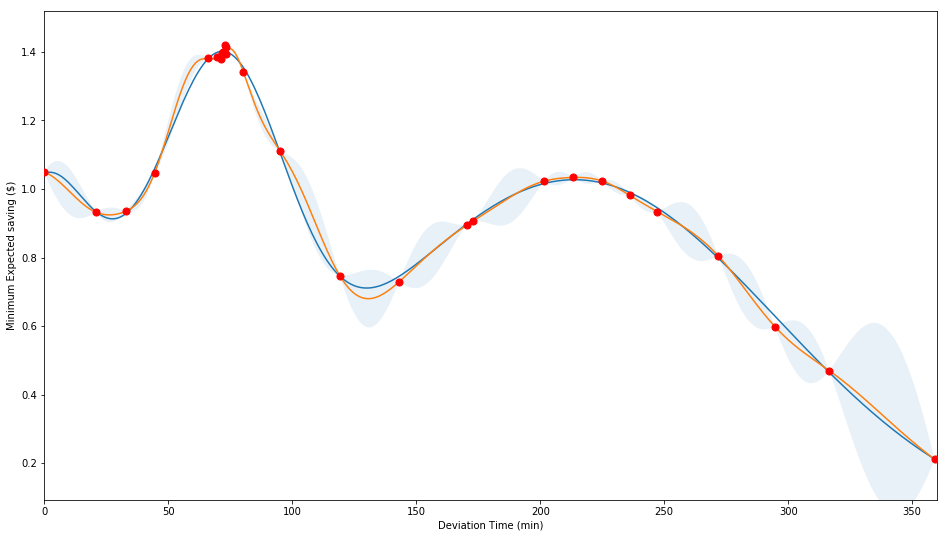

In [5]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

start_noise = 0.001
bo.maximize(init_points=2, n_iter=n_eval, acq="ucb", kappa=10, **gp_params,
            noise_sd=[start_noise * i for i in range(n_eval)])

plot_bo(f, bo)

#### Increasing-Noise Baysian Optimization with Upper Confidence Bound (25 queries) encouraging exploration

In [7]:
Noise Type: Linearly increasing Gaussian Noise:  Start sd value = 0.01

SyntaxError: invalid syntax (<ipython-input-7-a60ec8d8c497>, line 1)

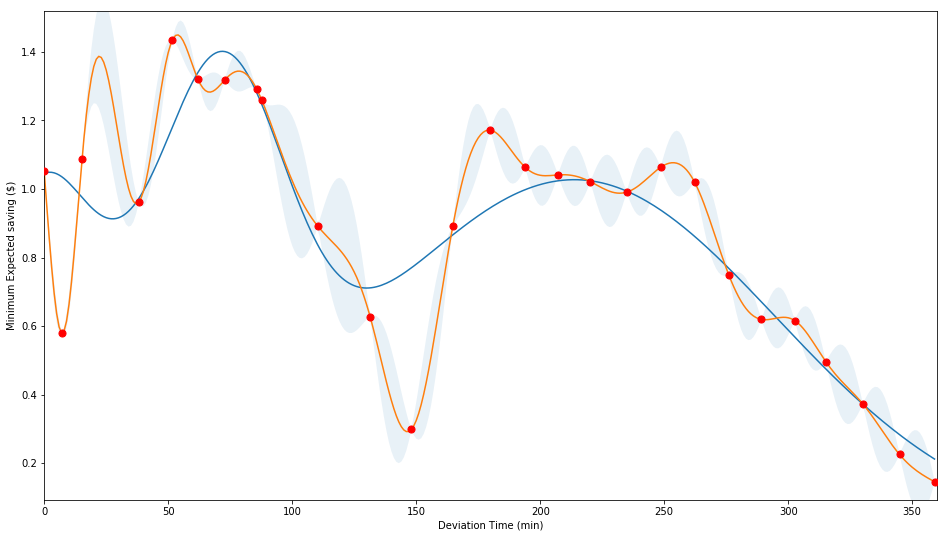

In [6]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

start_noise = 0.01
bo.maximize(init_points=2, n_iter=n_eval, acq="ucb", kappa=10, **gp_params,
            noise_sd=[start_noise * i for i in range(n_eval)])

plot_bo(f, bo)